# <span style = 'color:purple'> Imports & Settings

#### Imports

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
import random

from lib.pca import *
from lib.team_wr_scraping import create_win_rate_df
from lib.transition_utils import transition_matrix
from lib.plots import *

%reload_ext autoreload
%autoreload 2

#### Settings

#### Constants

In [3]:
RAW_DATA_PATH = Path('./raw_data')
PREPROC_DATA_PATH = Path('./preproc_data')

# <span style = 'color:cyan'> Data

## Loading

### Clusters <span style = 'color:orange'> Dropped duplicate player(Marcus Williams)

In [4]:
cdf = pd.concat([pd.read_excel(RAW_DATA_PATH/ 'ke_clusters' / filename,index_col = 0).sort_index() for filename in os.listdir(RAW_DATA_PATH / 'ke_clusters')])
cdf


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,clusters
_2000_B.J. Armstrong,0.400353,-0.120081,-0.442107,0.446296,-0.168847,0.342628,0.561371,0.595014,-0.046011,0.242544,-0.148327,0.237264,0.068778,9
_2000_Calbert Cheaney,0.443183,0.031056,-0.143349,0.372185,-0.049275,0.307533,0.399967,0.753198,-0.011895,0.302932,0.193965,0.432579,0.226102,9
_2000_Cedric Henderson,0.401520,0.171496,-0.518244,0.350025,-0.037235,0.242663,0.230140,0.672011,-0.008865,0.322340,0.161841,0.435439,0.103909,9
_2000_Chris Carr,0.490017,0.038236,-0.847660,0.293984,-0.188295,0.532373,0.308419,0.660366,-0.038134,0.489035,-0.040418,0.318085,0.148798,9
_2000_Corey Benjamin,0.353585,-0.122464,-0.685638,0.275124,-0.143959,0.486509,0.318585,0.717680,0.066375,0.528001,-0.045688,0.193347,0.181986,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_2022_Thanasis Antetokounmpo,0.138849,0.397945,-0.459418,0.433997,-0.126807,0.371307,0.334140,0.950001,0.080450,0.547728,0.215446,0.552651,0.182283,3
_2022_Tony Bradley,0.133875,0.676509,-0.363011,0.322284,0.398793,0.563179,0.392870,0.828958,0.500279,0.553529,0.383395,0.415409,0.104896,3
_2022_Wenyen Gabriel,0.200800,0.429369,-0.517160,0.202288,0.209428,0.523913,0.288678,0.661017,0.378835,0.617905,0.439525,0.531189,0.426694,3
_2022_Zach Collins,0.369782,0.432792,-0.660432,0.479319,0.282782,0.709085,0.423925,0.831580,0.497648,0.725508,0.377703,0.690518,0.158232,3


In [5]:
cdf[cdf.index.duplicated()].drop_duplicates()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,clusters
_2008_Marcus Williams,0.178456,-0.151433,-0.625109,0.588556,-0.137044,0.873331,0.570072,0.876226,0.132715,0.492121,0.101830,0.275963,0.110271,9
_2008_Marcus Williams,0.322141,-0.151433,-0.625109,0.587361,-0.482016,0.663614,0.599538,0.793647,-0.241355,0.430910,0.101830,0.219824,0.313519,1
_2008_Marcus Williams,0.406594,-0.151433,-0.625109,0.587361,-0.549923,0.663614,0.570072,0.874732,-0.241355,0.492121,0.101830,0.275963,0.313519,1
_2008_Marcus Williams,0.322141,0.333179,-0.483214,0.687123,-0.482016,0.372033,0.547705,0.795141,0.129453,0.135034,0.176620,0.298622,0.294949,1
_2008_Marcus Williams,0.268766,0.056443,-0.634580,0.398329,0.009116,0.776705,0.166134,0.505501,-0.241355,0.237619,0.447698,0.441623,-0.055397,5
_2008_Marcus Williams,0.353219,0.056443,-0.634580,0.398329,-0.058792,0.776705,0.136668,0.586585,-0.241355,0.298830,0.447698,0.497762,-0.055397,5
_2008_Marcus Williams,0.040628,0.056443,-0.634580,0.399524,0.421994,0.986422,0.166134,0.506995,0.132715,0.237619,0.447698,0.441623,-0.258645,5
_2008_Marcus Williams,0.125081,0.056443,-0.634580,0.399524,0.354087,0.986422,0.136668,0.588079,0.132715,0.298830,0.447698,0.497762,-0.258645,5
_2008_Marcus Williams,0.406594,0.333179,-0.483214,0.687123,-0.549923,0.372033,0.518239,0.876226,0.129453,0.196245,0.176620,0.354761,0.294949,6
_2008_Marcus Williams,0.268766,0.541055,-0.492685,0.498090,0.009116,0.485124,0.114300,0.506995,0.129453,-0.058257,0.522488,0.520421,-0.073966,3


In [6]:
dupl_pl = cdf[cdf.index.duplicated()].index.drop_duplicates()
dupl_pl

Index(['_2008_Marcus Williams'], dtype='object')

In [7]:
cdf['clusters'].value_counts()

clusters
8    1047
9    1038
3     993
1     987
5     900
2     855
0     731
6     720
4     674
7     566
Name: count, dtype: int64

In [8]:
cdf.drop(index=dupl_pl, inplace=True),
cdf.shape

(8495, 14)

### Team and play time

In [9]:
tdf = pd.concat([pd.read_excel(RAW_DATA_PATH/ 'advanced_data' / filename,index_col = 0).sort_index() for filename in os.listdir(RAW_DATA_PATH / 'advanced_data')]).set_index('PLAYER')
tdf

,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,...,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS
PLAYER,,,,,,,,,,,,,,,,,,,,,
_2008_Adonal Foyle,ORL,33,82,52,30,9.4,99.1,99.6,-0.5,3.8,...,9.3,17.4,13.4,14.6,45.8,46.4,12.0,92.18,7.0,"1,481"
_2008_Al Jefferson,MIN,23,82,22,60,35.6,102.4,112.2,-9.8,7.5,...,10.5,22.7,16.3,8.8,50.0,53.5,27.3,92.85,14.7,"5,648"
_2008_Allen Iverson,DEN,33,82,50,32,41.8,109.7,104.7,5.1,27.1,...,1.3,5.4,3.4,9.0,48.8,56.7,26.3,100.90,13.6,"7,195"
_2008_Andray Blatche,WAS,21,82,43,39,20.4,102.0,108.2,-6.2,9.6,...,10.0,16.7,13.3,13.9,47.7,51.2,19.4,92.34,8.4,"3,202"
_2008_Andre Iguodala,PHI,24,82,40,42,39.5,104.3,104.1,0.2,20.7,...,2.7,11.9,7.2,10.2,49.5,54.3,23.6,91.54,13.3,"6,181"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_2016_Nate Robinson,NOP,32,2,0,2,11.6,73.5,112.0,-38.5,28.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.8,101.99,-1.6,49
_2016_Thanasis Antetokounmpo,NYK,23,2,1,1,3.1,107.7,142.9,-35.2,0.0,...,0.0,11.1,6.7,0.0,75.0,75.0,28.6,103.68,14.0,13
_2016_Dahntay Jones,CLE,35,1,0,1,42.4,110.1,108.6,1.5,6.7,...,2.4,9.5,6.0,0.0,46.4,46.4,15.6,90.67,4.7,79


In [10]:
dupl_pl = tdf.reset_index()['PLAYER'].value_counts()[tdf.reset_index()['PLAYER'].value_counts() >1].index.to_list()
dupl_pl

['_2008_Marcus Williams',
 '_2014_Tony Mitchell',
 '_2009_Marcus Williams',
 '_2013_Chris Johnson']

In [11]:
tdf[tdf.index.isin(dupl_pl)]

,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,...,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS
PLAYER,,,,,,,,,,,,,,,,,,,,,
_2008_Marcus Williams,NJN,22,53,21,32,16.1,100.9,111.7,-10.8,28.5,...,1.7,10.9,6.2,14.2,47.1,49.9,20.7,94.30,8.7,"1,677"
_2008_Marcus Williams,LAC,21,11,3,8,3.3,93.2,90.9,2.3,14.3,...,7.5,21.6,13.3,0.0,25.0,25.0,21.7,100.56,5.5,74
_2014_Tony Mitchell,DET,22,21,6,15,3.8,99.4,93.1,6.2,4.0,...,15.6,16.7,16.0,14.8,45.8,54.0,12.9,96.75,9.8,159
_2014_Tony Mitchell,MIL,24,3,0,3,3.3,122.2,111.1,11.1,20.0,...,16.7,0.0,7.1,0.0,60.0,60.0,23.8,88.62,16.3,18
_2013_Chris Johnson,MIN,27,30,8,22,9.5,106.6,110.2,-3.5,4.2,...,7.6,13.7,10.8,11.5,64.0,65.0,16.5,94.41,9.1,557
_2013_Chris Johnson,MEM,23,8,4,4,12.8,111.7,92.5,19.2,2.5,...,4.6,6.2,5.3,9.7,56.0,56.0,12.1,93.08,6.2,197
_2009_Marcus Williams,GSW,23,9,2,7,5.9,96.5,101.7,-5.2,34.2,...,0.0,6.0,3.1,10.8,29.4,30.5,17.8,102.66,2.2,114
_2009_Marcus Williams,SAS,22,2,1,1,1.7,142.9,162.5,-19.6,0.0,...,0.0,0.0,0.0,0.0,100.0,100.0,25.0,106.35,14.0,7


In [12]:
tdf['YEAR'] = [int(_.split("_")[1]) for _ in tdf.index]
tdf['PLAYER_NAME'] = [_.split("_")[-1] for _ in tdf.index]
tdf['TOT_MIN'] = tdf['MIN'] * tdf['GP']
tdf

,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,...,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS,YEAR,PLAYER_NAME,TOT_MIN
PLAYER,,,,,,,,,,,,,,,,,,,,,
_2008_Adonal Foyle,ORL,33,82,52,30,9.4,99.1,99.6,-0.5,3.8,...,14.6,45.8,46.4,12.0,92.18,7.0,"1,481",2008,Adonal Foyle,770.8
_2008_Al Jefferson,MIN,23,82,22,60,35.6,102.4,112.2,-9.8,7.5,...,8.8,50.0,53.5,27.3,92.85,14.7,"5,648",2008,Al Jefferson,2919.2
_2008_Allen Iverson,DEN,33,82,50,32,41.8,109.7,104.7,5.1,27.1,...,9.0,48.8,56.7,26.3,100.90,13.6,"7,195",2008,Allen Iverson,3427.6
_2008_Andray Blatche,WAS,21,82,43,39,20.4,102.0,108.2,-6.2,9.6,...,13.9,47.7,51.2,19.4,92.34,8.4,"3,202",2008,Andray Blatche,1672.8
_2008_Andre Iguodala,PHI,24,82,40,42,39.5,104.3,104.1,0.2,20.7,...,10.2,49.5,54.3,23.6,91.54,13.3,"6,181",2008,Andre Iguodala,3239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_2016_Nate Robinson,NOP,32,2,0,2,11.6,73.5,112.0,-38.5,28.6,...,0.0,0.0,0.0,1.8,101.99,-1.6,49,2016,Nate Robinson,23.2
_2016_Thanasis Antetokounmpo,NYK,23,2,1,1,3.1,107.7,142.9,-35.2,0.0,...,0.0,75.0,75.0,28.6,103.68,14.0,13,2016,Thanasis Antetokounmpo,6.2
_2016_Dahntay Jones,CLE,35,1,0,1,42.4,110.1,108.6,1.5,6.7,...,0.0,46.4,46.4,15.6,90.67,4.7,79,2016,Dahntay Jones,42.4


## Preprocessing

### Merge

In [130]:
mdf = tdf[['TEAM','YEAR','PLAYER_NAME','TOT_MIN']].merge(cdf[['clusters']], right_index = True, left_index= True, how = 'left')
mdf['clusters'] = mdf['clusters'].fillna(99).astype(int)
n_clusters = mdf['clusters'].nunique()
clusters = mdf['clusters'].sort_values().unique()
mdf

,TEAM,YEAR,PLAYER_NAME,TOT_MIN,clusters
PLAYER,,,,,
_2008_Adonal Foyle,ORL,2008,Adonal Foyle,770.8,3
_2008_Al Jefferson,MIN,2008,Al Jefferson,2919.2,4
_2008_Allen Iverson,DEN,2008,Allen Iverson,3427.6,0
_2008_Andray Blatche,WAS,2008,Andray Blatche,1672.8,6
_2008_Andre Iguodala,PHI,2008,Andre Iguodala,3239.0,0
...,...,...,...,...,...
_2016_Nate Robinson,NOP,2016,Nate Robinson,23.2,99
_2016_Thanasis Antetokounmpo,NYK,2016,Thanasis Antetokounmpo,6.2,99
_2016_Dahntay Jones,CLE,2016,Dahntay Jones,42.4,99


In [14]:
df = mdf.pivot_table(index = ['YEAR','TEAM'], columns='clusters', values='TOT_MIN', aggfunc= 'sum').fillna(0)
df.columns = df.columns.astype(int)
df['tot_min_season'] = df.sum(axis = 1)
# df = df/df['tot_min_season']
df

clusters        0       1       2       3       4       5       6       7  \
YEAR TEAM                                                                   
2000 ATL      0.0  3815.3  4853.0  1084.1  2779.8     0.0  2510.8  2984.8   
     BOS   5175.4  1929.6     0.0  3293.9  3001.2   427.2   858.0     0.0   
     CHH   5556.0  2096.4     0.0  1364.3  3132.4  2775.4     0.0  4888.2   
     CHI      0.0  1353.8  6675.7  1980.1  2997.0  1178.1  2667.7     0.0   
     CLE      0.0  3860.7  4587.2  3522.9  2492.8     0.0     0.0     0.0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2022 SAC      0.0  1003.8  4669.9  1639.3  2132.8  2337.0     0.0  1075.5   
     SAS   2366.4  1145.4     0.0   501.2     0.0  2317.2     0.0  1972.0   
     TOR   5040.7   847.6     0.0  2712.8  2619.6  3238.2     0.0  1688.0   
     UTA   4323.8  1129.2     0.0     0.0     0.0  1766.1     0.0  3282.1   
     WAS   1440.0  3404.0     0.0   462.0  3683.4     0.0   440.1  1447.2   

clusters        8       9     99  tot_min_season  
YEAR TEAM                                         
2000 ATL      0.0  1305.0  158.4         19491.2  
     BOS      0.0  4702.9  310.2         19698.4  
     CHH    823.2     0.0   72.4         20708.3  
     CHI      0.0  2610.0  176.2         19638.6  
     CLE   2054.0  2907.0  844.6         20269.2  
...           ...     ...    ...             ...  
2022 SAC   5412.7  2368.8  369.5         21009.3  
     SAS   8763.8   965.0  476.5         18507.5  
     TOR   4178.0     0.0  434.0         20758.9  
     UTA   8144.4  1180.6  523.9         20350.1  
     WAS   6111.6   945.0  606.5         18539.8  

[685 rows x 12 columns]

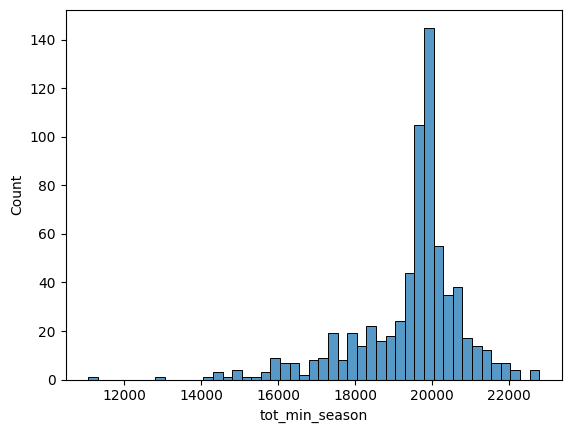

In [15]:
sns.histplot(data = df, x = 'tot_min_season');

In [16]:
df.sort_values('tot_min_season').head(10)

clusters        0       1       2       3       4       5       6       7  \
YEAR TEAM                                                                   
2020 GSW      0.0  2238.2  4934.6     0.0     0.0     0.0  1197.7     0.0   
     MIN      0.0   591.0  3003.5   495.0  1186.5  1002.0     0.0     0.0   
2012 POR   1908.0   955.9  3407.6  1265.6  1996.5     0.0  1690.2     0.0   
     CLE      0.0   669.9  6814.1   826.2   785.0     0.0  1755.2     0.0   
     WAS   2389.2   780.8  1753.6  1077.3  1111.5  1431.0  1886.6  1174.2   
2020 DET      0.0   353.7  4369.8   600.0  1326.8     0.0   774.0     0.0   
     CHA      0.0  1408.4  8131.4   375.1     0.0     0.0  2368.0     0.0   
2012 GSW    730.6  2085.9  3257.4  1126.4  2120.4     0.0  1304.9     0.0   
     CHA      0.0     0.0  7356.1     0.0     0.0     0.0  5029.2     0.0   
2021 ORL      0.0     0.0  4471.9   799.8     0.0     0.0  2103.8     0.0   

clusters        8       9      99  tot_min_season  
YEAR TEAM                                          
2020 GSW      0.0  1271.1  1426.2         11067.8  
     MIN      0.0  6127.4   448.5         12853.9  
2012 POR   2230.8   536.0   286.8         14277.4  
     CLE      0.0  3074.0   384.3         14308.7  
     WAS      0.0  2160.2   659.4         14423.8  
2020 DET      0.0  6607.9   450.2         14482.4  
     CHA      0.0  1857.9   643.2         14784.0  
2012 GSW   3461.1     0.0   759.6         14846.3  
     CHA      0.0  1766.5   717.8         14869.6  
2021 ORL      0.0  6253.8  1397.6         15026.9

In [17]:
df.sort_values('tot_min_season',ascending=False).head(4)

,clusters,0,1,2,3,4,5,6,7,8,9,99,tot_min_season
YEAR,TEAM,,,,,,,,,,,,
2015,HOU,2980.8,1199.3,0.0,855.6,4336.8,2435.6,0.0,2112.8,6740.2,1351.6,769.3,22782.0
2017,WAS,2839.2,2516.4,4769.0,554.9,4929.6,0.0,1065.6,0.0,2608.0,2879.0,442.9,22604.6
2004,TOR,2788.6,4147.2,2514.6,1458.1,5504.8,1225.0,0.0,0.0,2140.2,2163.6,617.0,22559.1
2016,MIA,5991.1,864.0,2705.4,764.4,0.0,1704.0,0.0,2124.3,6403.9,1559.4,427.7,22544.2


### Player and clusters analysis

#### Top players in minutes per cluster

In [18]:
ke_demo_players = ['_2000_Allen Iverson','_2009_Kobe Bryant','_2020_LeBron James',
                   '_2000_Karl Malone', '_2008_Dirk Nowitzki','_2022_Giannis Antetokounmpo',
                   "_2000_Shaquille O'Neal",'_2009_Yao Ming','_2018_Joel Embiid']
hl_cl = mdf.loc[ke_demo_players]['clusters'].unique()
mdf.loc[ke_demo_players]

,TEAM,YEAR,PLAYER_NAME,TOT_MIN,clusters
PLAYER,,,,,
_2000_Allen Iverson,PHI,2000,Allen Iverson,2856.0,0
_2009_Kobe Bryant,LAL,2009,Kobe Bryant,2960.2,0
_2020_LeBron James,LAL,2020,LeBron James,2318.2,0
_2000_Karl Malone,UTA,2000,Karl Malone,2943.8,4
_2008_Dirk Nowitzki,DAL,2008,Dirk Nowitzki,2772.0,4
_2022_Giannis Antetokounmpo,MIL,2022,Giannis Antetokounmpo,2204.3,4
_2000_Shaquille O'Neal,LAL,2000,Shaquille O'Neal,3167.9,7
_2009_Yao Ming,HOU,2009,Yao Ming,2587.2,7
_2018_Joel Embiid,PHI,2018,Joel Embiid,1915.2,7


In [19]:
cl_dict = {}
for cl in mdf['clusters'].sort_values().unique():
    _ = mdf[mdf['clusters'] == cl].sort_values('TOT_MIN', ascending = False).reset_index()
    _['PL'] = _['PLAYER'] + '_' + _['TEAM']
    cl_dict[cl] = _['PL'].head(10)

pd.DataFrame(cl_dict)

,0,1,2,3,4,5,6,7,8,9,99
0,_2003_Allen Iverson_PHI,_2004_Rafer Alston_MIA,_2001_Antawn Jamison_GSW,_2000_P.J. Brown_MIA,_2003_Kevin Garnett_MIN,_2003_Lucious Harris_NJN,_2000_Michael Olowokandi_LAC,_2002_Tim Duncan_SAS,_2003_Shawn Marion_PHX,_2007_Trenton Hassell_MIN,_2022_Aleksej Pokusevski_OKC
1,_2000_Michael Finley_DAL,_2001_Mark Jackson_NYK,_2001_Antoine Walker_BOS,_2004_Jason Collins_NJN,_2006_Shawn Marion_PHX,_2000_Aaron McKie_PHI,_2001_Aaron Williams_NJN,_2003_Tim Duncan_SAS,_2006_Antawn Jamison_WAS,_2016_Hollis Thompson_PHI,_2021_Aleksej Pokusevski_OKC
2,_2001_Michael Finley_DAL,_2005_Luke Ridnour_SEA,_2003_Jalen Rose_CHI,_2010_Anderson Varejao_CLE,_2001_Anthony Mason_MIA,_2003_Walter McCarty_BOS,_2003_Malik Allen_MIA,_2001_Tim Duncan_SAS,_2004_Peja Stojakovic_SAC,_2002_Jumaine Jones_CLE,_2021_Xavier Tillman_MEM
3,_2008_Allen Iverson_DEN,_2000_Avery Johnson_SAS,_2008_Joe Johnson_ATL,_2005_Mark Blount_BOS,_2001_Shareef Abdur-Rahim_VAN,_2007_Chris Duhon_CHI,_2009_Jason Thompson_SAC,_2000_Shaquille O'Neal_LAL,_2005_Joe Johnson_PHX,_2001_Eric Piatkowski_LAC,_2008_Marcus Williams_NJN
4,_2000_Gary Payton_SEA,_2005_Gary Payton_BOS,_2004_Joe Johnson_PHX,_2011_Thaddeus Young_PHI,_2000_Kevin Garnett_MIN,_2006_Clifford Robinson_NJN,_2009_Spencer Hawes_SAC,_2004_Ben Wallace_DET,_2004_Cuttino Mobley_HOU,_2011_Ryan Gomes_LAC,_2022_Brandon Boston Jr._LAC
5,_2002_Antoine Walker_BOS,_2008_Jose Calderon_TOR,_2006_Joe Johnson_ATL,_2009_Luc Mbah a Moute_MIL,_2004_Kevin Garnett_MIN,_2007_Michael Finley_SAS,_2011_JJ Hickson_CLE,_2011_Pau Gasol_LAL,_2011_Luol Deng_CHI,_2006_Jumaine Jones_CHA,_2022_Xavier Tillman_MEM
6,_2003_Kobe Bryant_LAL,_2010_Beno Udrih_SAC,_2002_Latrell Sprewell_NYK,_2000_Jerome Williams_DET,_2006_Lamar Odom_LAL,_2005_Casey Jacobsen_NOH,_2000_Jamie Feick_NJN,_2005_Elton Brand_LAC,_2000_Allan Houston_NYK,_2005_Trenton Hassell_MIN,_2021_Matt Thomas_UTA
7,_2006_Gilbert Arenas_WAS,_2001_Travis Best_IND,_2001_Gary Payton_SEA,_2011_Luc Mbah a Moute_MIL,_2000_Shareef Abdur-Rahim_VAN,_2000_Derek Fisher_LAL,_2006_Tony Battie_ORL,_2000_Dikembe Mutombo_ATL,_2002_Eddie Jones_MIA,_2011_Wesley Johnson_MIN,_2008_DJ Mbenga_LAL
8,_2005_LeBron James_CLE,_2002_Kenny Anderson_BOS,_2003_Antawn Jamison_GSW,_2003_Corliss Williamson_DET,_2011_LaMarcus Aldridge_POR,_2002_Devean George_LAL,_2013_Bismack Biyombo_CHA,_2011_Dwight Howard_ORL,_2002_Wally Szczerbiak_MIN,_2018_Dragan Bender_PHX,_2002_Chris Dudley_POR
9,_2006_LeBron James_CLE,_2008_Steve Blake_POR,_2011_Monta Ellis_GSW,_2005_Jared Jeffries_WAS,_2004_Shawn Marion_PHX,_2016_Thabo Sefolosha_ATL,_2002_Nazr Mohammed_ATL,_2001_Shaquille O'Neal_LAL,_2004_Jim Jackson_HOU,_2004_Raja Bell_UTA,_2005_Jamal Sampson_CHA


#### Player appearing in multiple clusters

In [20]:
mc_df = mdf.pivot_table(index = 'PLAYER_NAME', columns= 'clusters', values = 'YEAR', aggfunc = 'count').fillna(0).astype(int)
mc_df.columns = mc_df.columns.astype(int)
mc_df['n_clusters'] = (mc_df >0).sum(axis=1)
mc_df.sort_values('n_clusters', ascending= False).head(10)

clusters,0,1,2,3,4,5,6,7,8,9,99,n_clusters
PLAYER_NAME,,,,,,,,,,,,
Wilson Chandler,0,0,4,0,1,1,1,0,3,1,1,7
Danny Granger,1,0,3,1,0,1,0,0,2,1,1,7
Kelly Olynyk,0,0,1,2,1,1,1,0,1,2,0,7
Ersan Ilyasova,0,0,1,2,2,2,0,0,2,3,1,7
Travis Outlaw,0,0,1,1,1,0,1,0,1,5,1,7
Richard Jefferson,2,0,5,1,0,3,0,0,4,1,1,7
Tracy McGrady,6,1,1,0,2,1,0,0,1,1,0,7
Aaron Brooks,2,3,1,0,0,1,0,0,1,1,1,7
Ryan Anderson,0,0,3,1,1,1,0,0,3,1,2,7


In [21]:
if not 'TOT_MIN' in mc_df.columns :
    mc_df = mc_df.merge(mdf.groupby('PLAYER_NAME').sum()['TOT_MIN'], left_index=True, right_index=True)
mc_df.sort_values('TOT_MIN', ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,99,n_clusters,TOT_MIN
PLAYER_NAME,,,,,,,,,,,,,
LeBron James,19,0,0,0,0,0,0,0,0,0,0,1,52141.2
Dirk Nowitzki,1,0,0,0,13,0,0,0,4,2,0,4,50430.2
Vince Carter,7,0,2,0,0,2,0,0,7,3,0,5,44625.5
Paul Pierce,12,0,2,0,0,1,0,0,2,0,1,5,44244.0
Joe Johnson,2,0,8,0,0,0,0,0,6,1,1,5,44242.5
Kobe Bryant,13,0,3,0,0,0,0,0,0,0,1,3,43592.8
Carmelo Anthony,5,0,6,0,5,0,0,0,2,0,1,5,43507.0
Tim Duncan,0,0,0,0,0,0,0,17,0,0,0,1,42221.4
Jason Terry,6,1,3,0,0,3,0,0,4,2,0,6,42031.7


In [22]:
pl_name = None
pl_name = 'Kobe Bryant'
if pl_name is None :
    pl_name = random.choice(mc_df.sort_values('TOT_MIN', ascending=False).head(50).index)
display(pd.DataFrame(mc_df.loc[pl_name]).T.astype(int))
mdf[mdf['PLAYER_NAME'] == pl_name].sort_values('YEAR')

,0,1,2,3,4,5,6,7,8,9,99,n_clusters,TOT_MIN
Kobe Bryant,13,0,3,0,0,0,0,0,0,0,1,3,43592


,TEAM,YEAR,PLAYER_NAME,TOT_MIN,clusters
PLAYER,,,,,
_2000_Kobe Bryant,LAL,2000,Kobe Bryant,2521.2,0
_2001_Kobe Bryant,LAL,2001,Kobe Bryant,2788.0,0
_2002_Kobe Bryant,LAL,2002,Kobe Bryant,3064.0,0
_2003_Kobe Bryant,LAL,2003,Kobe Bryant,3403.0,0
_2004_Kobe Bryant,LAL,2004,Kobe Bryant,2450.5,0
_2005_Kobe Bryant,LAL,2005,Kobe Bryant,2692.8,2
_2006_Kobe Bryant,LAL,2006,Kobe Bryant,3280.0,0
_2007_Kobe Bryant,LAL,2007,Kobe Bryant,3141.6,0
_2008_Kobe Bryant,LAL,2008,Kobe Bryant,3189.8,0


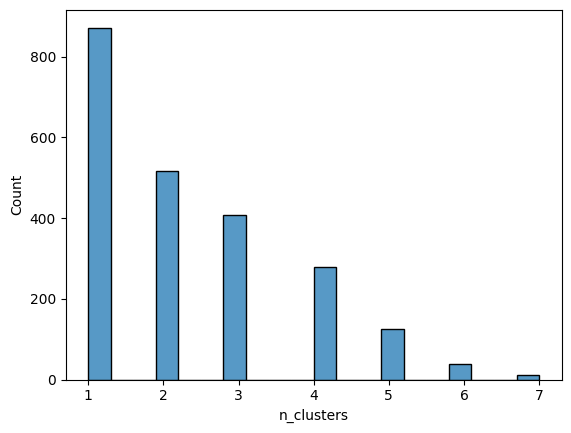

In [23]:
sns.histplot(data = mc_df, x = 'n_clusters');

### Team mapping

In [24]:
df = df.reset_index()
df

clusters,YEAR,TEAM,0,1,2,3,4,5,6,7,8,9,99,tot_min_season
0,2000,ATL,0.0,3815.3,4853.0,1084.1,2779.8,0.0,2510.8,2984.8,0.0,1305.0,158.4,19491.2
1,2000,BOS,5175.4,1929.6,0.0,3293.9,3001.2,427.2,858.0,0.0,0.0,4702.9,310.2,19698.4
2,2000,CHH,5556.0,2096.4,0.0,1364.3,3132.4,2775.4,0.0,4888.2,823.2,0.0,72.4,20708.3
3,2000,CHI,0.0,1353.8,6675.7,1980.1,2997.0,1178.1,2667.7,0.0,0.0,2610.0,176.2,19638.6
4,2000,CLE,0.0,3860.7,4587.2,3522.9,2492.8,0.0,0.0,0.0,2054.0,2907.0,844.6,20269.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2022,SAC,0.0,1003.8,4669.9,1639.3,2132.8,2337.0,0.0,1075.5,5412.7,2368.8,369.5,21009.3
681,2022,SAS,2366.4,1145.4,0.0,501.2,0.0,2317.2,0.0,1972.0,8763.8,965.0,476.5,18507.5
682,2022,TOR,5040.7,847.6,0.0,2712.8,2619.6,3238.2,0.0,1688.0,4178.0,0.0,434.0,20758.9
683,2022,UTA,4323.8,1129.2,0.0,0.0,0.0,1766.1,0.0,3282.1,8144.4,1180.6,523.9,20350.1


In [25]:
franchise_mapping_dict = {
    'VAN':'MEM',
    'CHH':'NOP',
    'NOK':'NOP',
    'NOH':'NOP',
    'SEA':'OKC',
    'NJN':'BKN'
}
for tm in df['TEAM'].unique():
    if tm not in franchise_mapping_dict :
        franchise_mapping_dict[tm] = tm

df['TEAM'] = df['TEAM'].map(franchise_mapping_dict)
mdf['TEAM'] = mdf['TEAM'].map(franchise_mapping_dict)

df

clusters,YEAR,TEAM,0,1,2,3,4,5,6,7,8,9,99,tot_min_season
0,2000,ATL,0.0,3815.3,4853.0,1084.1,2779.8,0.0,2510.8,2984.8,0.0,1305.0,158.4,19491.2
1,2000,BOS,5175.4,1929.6,0.0,3293.9,3001.2,427.2,858.0,0.0,0.0,4702.9,310.2,19698.4
2,2000,NOP,5556.0,2096.4,0.0,1364.3,3132.4,2775.4,0.0,4888.2,823.2,0.0,72.4,20708.3
3,2000,CHI,0.0,1353.8,6675.7,1980.1,2997.0,1178.1,2667.7,0.0,0.0,2610.0,176.2,19638.6
4,2000,CLE,0.0,3860.7,4587.2,3522.9,2492.8,0.0,0.0,0.0,2054.0,2907.0,844.6,20269.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2022,SAC,0.0,1003.8,4669.9,1639.3,2132.8,2337.0,0.0,1075.5,5412.7,2368.8,369.5,21009.3
681,2022,SAS,2366.4,1145.4,0.0,501.2,0.0,2317.2,0.0,1972.0,8763.8,965.0,476.5,18507.5
682,2022,TOR,5040.7,847.6,0.0,2712.8,2619.6,3238.2,0.0,1688.0,4178.0,0.0,434.0,20758.9
683,2022,UTA,4323.8,1129.2,0.0,0.0,0.0,1766.1,0.0,3282.1,8144.4,1180.6,523.9,20350.1


In [26]:
uncomplete_team_history = pd.DataFrame((df.reset_index()['TEAM'].value_counts() != 23)).query('count').index
uncomplete_team_history

Index(['CHA'], dtype='object', name='TEAM')

In [27]:
df['YEAR'].value_counts().sort_index()

YEAR
2000    29
2001    29
2002    29
2003    29
2004    29
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
2017    30
2018    30
2019    30
2020    30
2021    30
2022    30
Name: count, dtype: int64

In [28]:
df.pivot_table(index = 'TEAM', columns='YEAR', values = 'tot_min_season', aggfunc='sum')

YEAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
TEAM,,,,,,,,,,,,,,,,,,,,,
ATL,19491.2,17501.5,19784.1,19842.0,15302.3,17541.6,19806.2,20432.6,18136.8,19703.8,...,20281.5,19798.9,19975.1,20479.8,21157.7,16825.0,18551.3,17891.5,17919.0,18933.5
BKN,19874.8,20248.6,19571.5,19755.6,19755.1,20193.5,19810.9,20121.9,18176.0,19761.4,...,19880.3,20716.6,20599.6,17937.2,18571.9,19749.3,19828.3,17536.4,17935.4,18837.4
BOS,19698.4,19541.5,20432.9,20162.6,17599.2,20102.2,18798.0,19859.1,20726.8,20514.6,...,20585.5,18632.7,19175.0,19299.9,19760.0,20344.2,19783.0,17429.5,17155.8,19119.4
CHA,NaN,NaN,NaN,NaN,NaN,19295.9,19346.3,19617.0,19663.6,19938.0,...,20724.4,19711.5,20386.9,20133.3,18937.2,20015.3,21032.1,14784.0,17971.2,20591.1
CHI,19638.6,19850.9,16889.1,19931.5,19062.8,19820.3,19965.8,19772.1,19872.4,20732.7,...,20016.3,19806.7,19891.3,19669.4,18889.3,20131.5,18236.8,15684.9,19023.0,20172.5
CLE,20269.2,20638.3,19862.7,18450.7,20351.3,21071.7,20680.5,19885.9,20656.1,20472.9,...,20512.9,21147.4,22208.3,20436.3,21803.3,20260.4,18300.1,16367.5,17033.9,20362.7
DAL,19927.2,20011.2,21842.0,19746.0,20066.5,20684.9,19878.1,19190.6,21639.8,20021.0,...,19403.9,19849.8,20134.8,20284.0,18661.7,20102.6,17851.2,19427.0,17331.2,20187.3
DEN,20679.9,19144.3,17968.2,18001.6,20405.9,19954.3,20873.8,19114.5,19991.5,20162.8,...,19887.3,19703.8,18075.6,19623.0,21088.3,19948.4,19730.3,17980.6,18134.5,20727.6
DET,19675.6,19330.9,19677.2,19905.8,21496.4,20570.2,19377.7,20424.0,19874.5,19943.0,...,19274.7,19780.2,19122.3,19608.6,19806.8,20442.8,18877.7,14482.4,16544.6,18967.9


Investigation : there were only 29 teams in the NBA before the 2004/05 season

### Team playtime repartition and transitions

In [29]:
for col in df.columns :
    if type(col) == int :
        df[col] = df[col] / df['tot_min_season']      
df.sort_values('TEAM')

clusters,YEAR,TEAM,0,1,2,3,4,5,6,7,8,9,99,tot_min_season
0,2000,ATL,0.000000,0.195745,0.248984,0.055620,0.142618,0.000000,0.128817,0.153136,0.000000,0.066953,0.008127,19491.2
235,2008,ATL,0.000000,0.047858,0.549182,0.000000,0.298779,0.000000,0.051961,0.000000,0.000000,0.022192,0.030027,18136.8
295,2010,ATL,0.145515,0.036132,0.000000,0.055021,0.287729,0.066474,0.029667,0.000000,0.358718,0.000000,0.020744,19846.8
325,2011,ATL,0.000000,0.086697,0.370187,0.057050,0.282150,0.000000,0.099986,0.000000,0.000000,0.098497,0.005433,18939.6
355,2012,ATL,0.135269,0.000000,0.000000,0.057907,0.245893,0.140049,0.000000,0.021523,0.301020,0.057102,0.041238,16150.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2021,WAS,0.137557,0.135209,0.124883,0.135772,0.000000,0.098267,0.000000,0.046151,0.189557,0.080337,0.052267,17200.1
115,2003,WAS,0.398040,0.211194,0.000000,0.070614,0.000000,0.102592,0.089324,0.096959,0.000000,0.000000,0.031278,19882.7
324,2010,WAS,0.068363,0.112056,0.324673,0.038033,0.132272,0.055732,0.113923,0.000000,0.000000,0.136832,0.018115,17085.2
624,2020,WAS,0.000000,0.099111,0.445827,0.094016,0.000000,0.054491,0.155789,0.000000,0.088290,0.020625,0.041852,17920.4


In [30]:
df

clusters,YEAR,TEAM,0,1,2,3,4,5,6,7,8,9,99,tot_min_season
0,2000,ATL,0.000000,0.195745,0.248984,0.055620,0.142618,0.000000,0.128817,0.153136,0.000000,0.066953,0.008127,19491.2
1,2000,BOS,0.262732,0.097957,0.000000,0.167217,0.152358,0.021687,0.043557,0.000000,0.000000,0.238745,0.015747,19698.4
2,2000,NOP,0.268298,0.101235,0.000000,0.065882,0.151263,0.134024,0.000000,0.236050,0.039752,0.000000,0.003496,20708.3
3,2000,CHI,0.000000,0.068936,0.339927,0.100827,0.152608,0.059989,0.135840,0.000000,0.000000,0.132902,0.008972,19638.6
4,2000,CLE,0.000000,0.190471,0.226314,0.173806,0.122985,0.000000,0.000000,0.000000,0.101336,0.143420,0.041669,20269.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2022,SAC,0.000000,0.047779,0.222278,0.078027,0.101517,0.111236,0.000000,0.051192,0.257634,0.112750,0.017587,21009.3
681,2022,SAS,0.127862,0.061888,0.000000,0.027081,0.000000,0.125203,0.000000,0.106551,0.473527,0.052141,0.025746,18507.5
682,2022,TOR,0.242821,0.040831,0.000000,0.130681,0.126192,0.155991,0.000000,0.081315,0.201263,0.000000,0.020907,20758.9
683,2022,UTA,0.212471,0.055489,0.000000,0.000000,0.000000,0.086786,0.000000,0.161282,0.400214,0.058014,0.025744,20350.1


In [31]:
for tm in mdf['TEAM'].unique() :

    try :
        playtime_df = mdf[mdf['TEAM']==tm].pivot(index = 'PLAYER_NAME', columns = 'YEAR', values = 'TOT_MIN').fillna(0)
    except :
        print(f"{tm} - error")

In [32]:
mdf['dupl'] = mdf[['TEAM','PLAYER_NAME','YEAR']].duplicated()
display(mdf[mdf['dupl']].drop_duplicates())
mdf.drop(columns = 'dupl', inplace=True)

,TEAM,YEAR,PLAYER_NAME,TOT_MIN,clusters,dupl
PLAYER,,,,,,


In [33]:
tr_df = transition_matrix(df, mdf)
tr_df.set_index(['TEAM','YEAR'],inplace=True)
tr_df

,clusters,0,1,2,3,4,5,6,7,8,9,99,tot_min_season,player_jaccard,player_cosine,cluster_cosine
TEAM,YEAR,,,,,,,,,,,,,,,
ATL,2000,0.000000,0.195745,0.248984,0.055620,0.142618,0.000000,0.128817,0.153136,0.000000,0.066953,0.008127,19491.2,NaN,NaN,NaN
BOS,2000,0.262732,0.097957,0.000000,0.167217,0.152358,0.021687,0.043557,0.000000,0.000000,0.238745,0.015747,19698.4,NaN,NaN,NaN
NOP,2000,0.268298,0.101235,0.000000,0.065882,0.151263,0.134024,0.000000,0.236050,0.039752,0.000000,0.003496,20708.3,NaN,NaN,NaN
CHI,2000,0.000000,0.068936,0.339927,0.100827,0.152608,0.059989,0.135840,0.000000,0.000000,0.132902,0.008972,19638.6,NaN,NaN,NaN
CLE,2000,0.000000,0.190471,0.226314,0.173806,0.122985,0.000000,0.000000,0.000000,0.101336,0.143420,0.041669,20269.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAC,2022,0.000000,0.047779,0.222278,0.078027,0.101517,0.111236,0.000000,0.051192,0.257634,0.112750,0.017587,21009.3,0.300000,0.453423,0.623688
SAS,2022,0.127862,0.061888,0.000000,0.027081,0.000000,0.125203,0.000000,0.106551,0.473527,0.052141,0.025746,18507.5,0.250000,0.649804,0.635522
TOR,2022,0.242821,0.040831,0.000000,0.130681,0.126192,0.155991,0.000000,0.081315,0.201263,0.000000,0.020907,20758.9,0.266667,0.689450,0.625061


### Success

#### Win rate scrapper

In [34]:
save_success_df = False
if os.path.exists(PREPROC_DATA_PATH / 'team_success.csv'):
    success_df = pd.read_csv(PREPROC_DATA_PATH / 'team_success.csv')
else :
    success_df = create_win_rate_df(tr_df.reset_index()['YEAR'].unique().tolist(), save= False)
    save_success_df = True

success_df.set_index(['TEAM','YEAR'],inplace=True)
    

#### Conference semi-finals manual

In [35]:
csf = {2000: ['IND','PHI','NYK','MIA','LAL','PHX','POR','UTA'],
 2001: ['PHI','TOR','NOP','MIL','SAS','DAL','SAC','LAL'],
 2002: ['BKN','NOP','BOS','DET','SAC','DAL','SAS','LAL'],
 2003: ['BKN','PHI','BOS','DET','SAC','DAL','SAS','LAL'],
 2004: ['BKN','IND','MIA','DET','SAC','MIN','SAS','LAL'],
 2005: ['WAS','IND','MIA','DET','PHX','DAL','SAS','OKC'],
 2006: ['BKN','CLE','MIA','DET','PHX','DAL','SAS','LAC'],
 2007: ['BKN','CLE','CHI','DET','PHX','GSW','SAS','UTA'],
 2008: ['BOS','CLE','ORL','DET','LAL','NOP','SAS','UTA'],
 2009: ['BOS','CLE','ORL','ATL','LAL','HOU','DAL','DEN'],
 2010: ['BOS','CLE','ORL','ATL','LAL','UTA','PHX','SAS'],
 2011: ['BOS','CHI','MIA','ATL','LAL','DAL','OKC','MEM'],
 2012: ['BOS','PHI','MIA','IND','LAL','LAC','OKC','SAS'],
 2013: ['IND','CHI','MIA','NYK','GSW','MEM','OKC','SAS'],
 2014: ['IND','WAS','MIA','BKN','POR','LAC','OKC','SAS'],
 2015: ['ATL','WAS','CHI','CLE','GSW','LAC','MEM','HOU'],
 2016: ['ATL','MIA','TOR','CLE','GSW','POR','SAS','OKC'],
 2017: ['BOS','WAS','TOR','CLE','GSW','UTA','SAS','HOU'],
 2018: ['BOS','PHI','TOR','CLE','GSW','UTA','NOP','HOU'],
 2019: ['BOS','PHI','TOR','MIL','GSW','POR','DEN','HOU'],
 2020: ['BOS','MIA','TOR','MIL','LAL','LAC','DEN','HOU'],
 2021: ['PHI','ATL','BKN','MIL','UTA','LAC','DEN','PHX'],
 2022: ['PHI','MIA','BOS','MIL','MEM','GSW','DAL','PHX']}

In [36]:
success_df['csf'] = 0
for (team,year) in success_df.index:
    if team in csf[year] :
        success_df.loc[(team,year),'csf'] = 1
if save_success_df :
    success_df.to_csv(PREPROC_DATA_PATH / 'team_success.csv')
success_df


,,win_rate,csf
TEAM,YEAR,,
IND,2000,0.683,1
MIA,2000,0.634,1
NYK,2000,0.610,1
PHI,2000,0.598,1
NOP,2000,0.598,0
...,...,...,...
LAL,2022,0.402,0
SAC,2022,0.366,0
POR,2022,0.329,0


In [37]:
success_df.reset_index().groupby('TEAM').sum()[['csf']]

,csf
TEAM,
ATL,6
BKN,7
BOS,12
CHA,0
CHI,4
CLE,9
DAL,8
DEN,4
DET,7


#### Merging successes

In [38]:
(success_df.reset_index().groupby('YEAR').sum()[['csf']] != 8).query("csf")

,csf
YEAR,


In [39]:
tr_df = tr_df.merge(success_df, right_index=True, left_index=True)

## EDA

### Transition and sucess metrics

In [40]:
tr_df.reset_index(inplace=True)

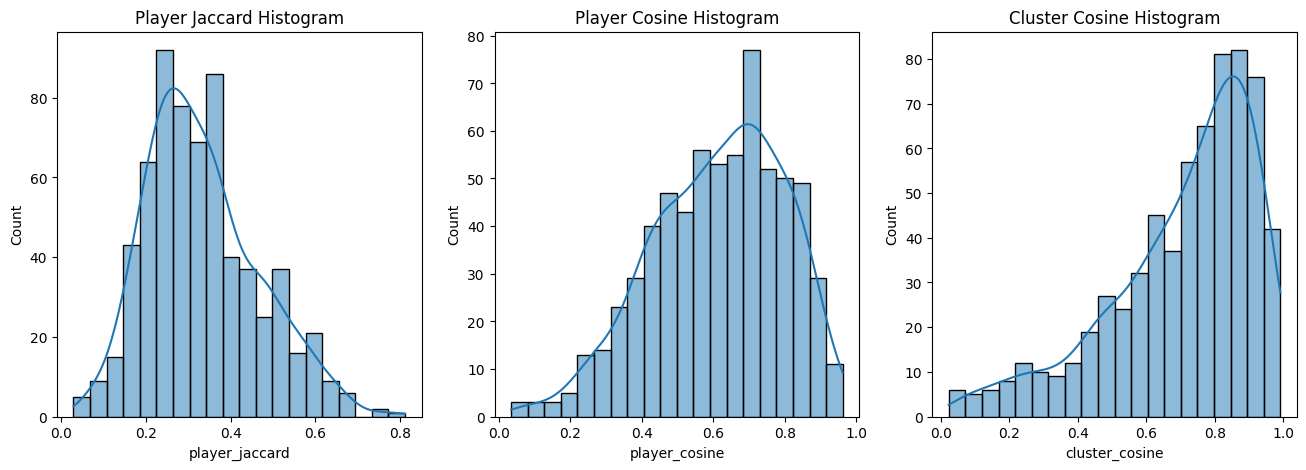

In [41]:
fig, axs = plt.subplots(1,3,figsize = (16,5))
sns.histplot(data = tr_df, x = 'player_jaccard', kde = True, ax = axs[0], bins = 20);
axs[0].set_title('Player Jaccard Histogram');
sns.histplot(data = tr_df, x = 'player_cosine', kde = True, ax = axs[1], bins = 20);
axs[1].set_title('Player Cosine Histogram');
sns.histplot(data = tr_df, x = 'cluster_cosine', kde = True, ax = axs[2], bins= 20);
axs[2].set_title('Cluster Cosine Histogram');


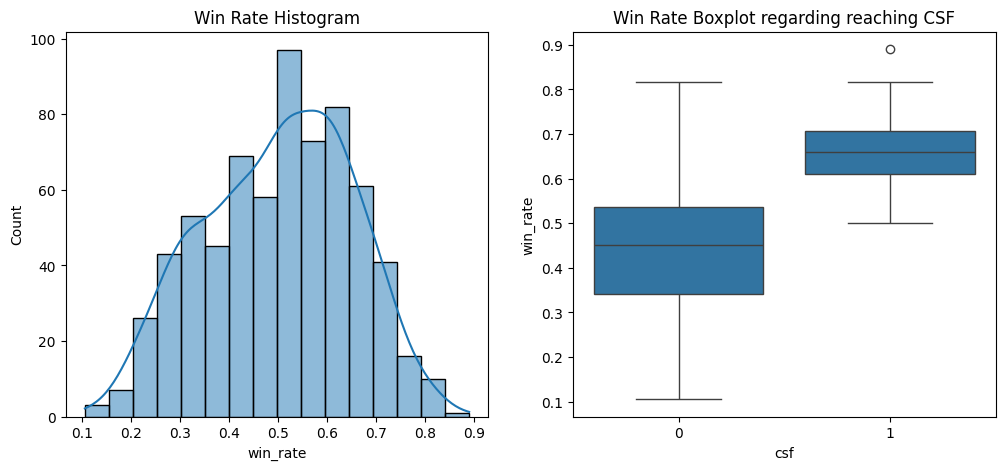

In [42]:
fig, axs = plt.subplots(1,2,figsize = (12,5))

sns.histplot(data = tr_df, x = 'win_rate', kde = True, ax = axs[0]);
axs[0].set_title("Win Rate Histogram");
sns.boxplot(data= tr_df, x = 'csf', y = 'win_rate', ax = axs[1])
axs[1].set_title("Win Rate Boxplot regarding reaching CSF");

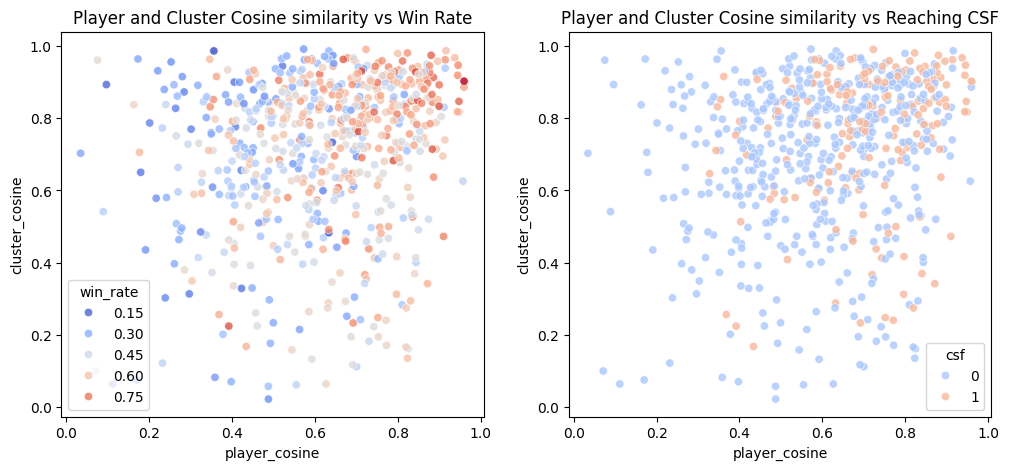

In [43]:
fig, axs = plt.subplots(1,2,figsize = (12,5))
sns.scatterplot(data=tr_df, x = 'player_cosine', y = 'cluster_cosine', alpha = 0.8, hue = 'win_rate', palette='coolwarm', ax = axs[0]);
axs[0].set_title("Player and Cluster Cosine similarity vs Win Rate");
sns.scatterplot(data=tr_df, x = 'player_cosine', y = 'cluster_cosine', alpha = 0.8, hue = 'csf', palette='coolwarm', ax = axs[1]);
axs[1].set_title("Player and Cluster Cosine similarity vs Reaching CSF");

In [44]:
tr_df[tr_df['TEAM']=='GSW']

,TEAM,YEAR,0,1,2,3,4,5,6,7,8,9,99,tot_min_season,player_jaccard,player_cosine,cluster_cosine,win_rate,csf
8,GSW,2000,0.000000,0.088270,0.267571,0.165523,0.285265,0.000000,0.024302,0.081213,0.000000,0.049712,0.038144,20307.1,NaN,NaN,NaN,0.232,0
37,GSW,2001,0.000000,0.000000,0.536105,0.029565,0.000000,0.000000,0.285911,0.072748,0.000000,0.043079,0.032591,20091.2,0.258065,0.619132,0.599479,0.207,0
66,GSW,2002,0.000000,0.179032,0.389939,0.000000,0.112273,0.000000,0.073482,0.163155,0.000000,0.062485,0.019634,19751.8,0.307692,0.634026,0.826125,0.256,0
94,GSW,2003,0.145315,0.123882,0.300179,0.000000,0.127199,0.066015,0.000000,0.190570,0.000000,0.000000,0.046840,19750.2,0.500000,0.788831,0.892055,0.463,0
123,GSW,2004,0.000000,0.292765,0.463438,0.000000,0.000000,0.058872,0.058763,0.118801,0.000000,0.000000,0.007360,20243.9,0.178571,0.430115,0.827839,0.451,0
153,GSW,2005,0.091319,0.128114,0.157061,0.049457,0.137348,0.093754,0.000000,0.098128,0.148168,0.076943,0.019708,17328.3,0.250000,0.523634,0.656771,0.415,0
183,GSW,2006,0.375226,0.000000,0.000000,0.102234,0.126854,0.067375,0.025527,0.092009,0.129869,0.059514,0.021393,19833.9,0.555556,0.956975,0.625738,0.415,0
213,GSW,2007,0.236599,0.047184,0.094192,0.023110,0.000000,0.000000,0.017094,0.116048,0.414858,0.032501,0.018412,20562.2,0.240000,0.417158,0.698604,0.512,1
243,GSW,2008,0.319050,0.018732,0.145290,0.042442,0.000000,0.000000,0.000000,0.105612,0.111323,0.227177,0.030373,19645.5,0.391304,0.908492,0.695269,0.585,0
273,GSW,2009,0.000000,0.093873,0.481031,0.000000,0.092555,0.000000,0.090271,0.084518,0.000000,0.141131,0.016620,20096.2,0.280000,0.468283,0.473174,0.354,0


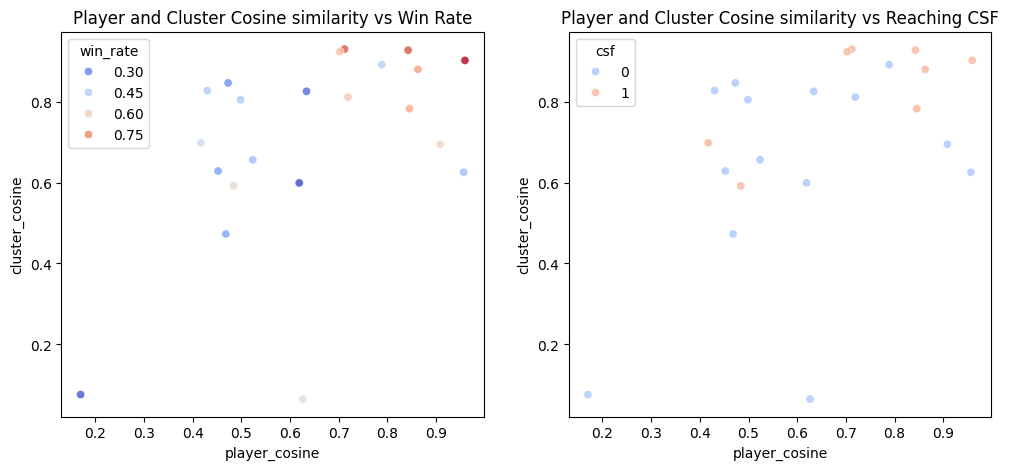

In [45]:
tm = 'GSW'

fig, axs = plt.subplots(1,2,figsize = (12,5))
sns.scatterplot(data=tr_df[tr_df['TEAM']==tm], x = 'player_cosine', y = 'cluster_cosine', alpha = 0.8, hue = 'win_rate', palette='coolwarm', ax = axs[0]);
axs[0].set_title("Player and Cluster Cosine similarity vs Win Rate");
sns.scatterplot(data=tr_df[tr_df['TEAM']==tm], x = 'player_cosine', y = 'cluster_cosine', alpha = 0.8, hue = 'csf', palette='coolwarm', ax = axs[1]);
axs[1].set_title("Player and Cluster Cosine similarity vs Reaching CSF");

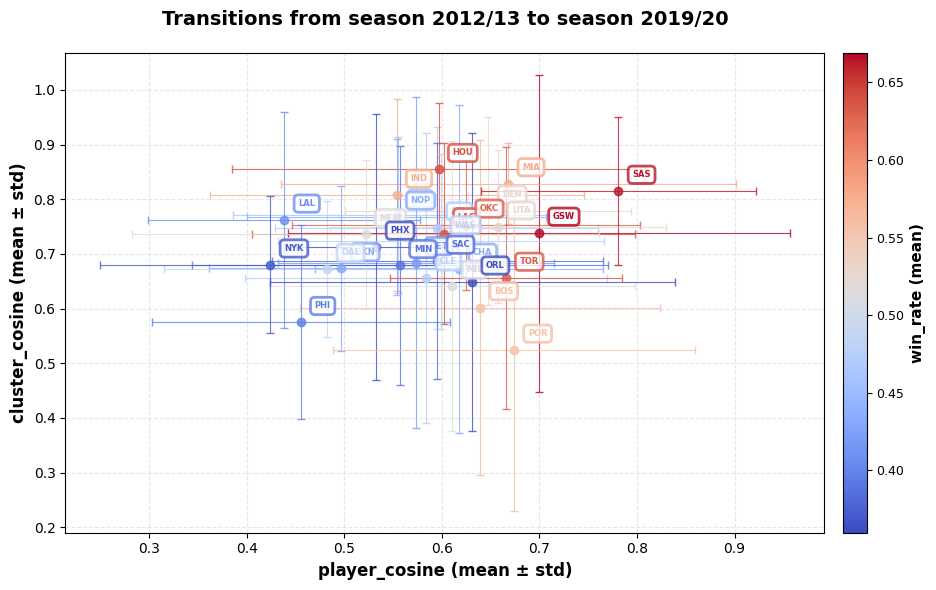

In [46]:
year_from = 2013 #2000
year_to = 2020 #2022

filter_years = [y for y in tr_df['YEAR'].unique()if y >= year_from and y <= year_to]

fig, ax= plot_grouped_scatter_with_errorbars(
    input_df=tr_df,
    group_column='TEAM',
    hue_column='win_rate',
    x_column='player_cosine',
    y_column='cluster_cosine',
    title=f'Transitions from season {year_from-1}/{str(year_from-2000).zfill(2)} to season {year_to-1}/{str(year_to-2000).zfill(2)}',
    cmap='coolwarm',
    filter_column= 'YEAR',
    filter_values= filter_years
)

plt.show()


### Clusters vs success regressions

#### Multiple regressors

In [47]:
X_cl = tr_df[[col for col in tr_df.columns if type(col) == int]]
Y_wr = tr_df['win_rate'].values
Y_csf = tr_df['csf'].values
X_cl.shape, Y_wr.shape, Y_csf.shape

((685, 11), (685,), (685,))

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

pd.Series([vif(X_cl.values, i) 
               for i in range(X_cl.shape[1])], 
              index=X_cl.columns)

# pd.Series([vif(sm.add_constant(X_cl).values, i) 
#                for i in range(sm.add_constant(X_cl).shape[1])], 
#               index=sm.add_constant(X_cl).columns)


0     3.808416
1     2.695946
2     3.316822
3     2.630941
4     2.332051
5     2.088348
6     2.559019
7     2.845125
8     2.669222
9     2.099518
99    3.007060
dtype: float64

In [50]:
# linreg_cl = sm.OLS(Y_wr,X_cl).fit()
linreg_cl = sm.OLS(Y_wr,sm.add_constant(X_cl)).fit()
linreg_cl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     127.5
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          4.02e-148
Time:                        15:16:32   Log-Likelihood:                 692.11
No. Observations:                 685   AIC:                            -1362.
Df Residuals:                     674   BIC:                            -1312.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4111      0.014     28.555      0.000       0.383       0.439
0              0.3241      0.046      7.118      0.000       0.235       0.414
1             -0.0247      0.054     -0.461      0.645      -0.130       0.081
2             -0.1541      0.038     -4.107      0.000      -0.228      -0.080
3              0.0340      0.058      0.582      0.561      -0.081       0.149
4              0.1275      0.038      3.326      0.001       0.052       0.203
5              0.3266      0.055      5.959      0.000       0.219       0.434
6             -0.1922      0.055     -3.468      0.001      -0.301      -0.083
7              0.3776      0.056      6.703      0.000       0.267       0.488
8              0.2667      0.034      7.747      0.000       0.199       0.334
9             -0.1678      0.045     -3.739      0.000      -0.256      -0.080
99            -0.5067      0.185     -2.740      0.006      -0.870      -0.144
==============================================================================
Omnibus:                        0.343   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.412
Skew:                          -0.049   Prob(JB):                        0.814
Kurtosis:                       2.929   Cond. No.                     2.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
logreg_cl_mod = sm.Logit(Y_csf, X_cl)
# logreg_cl_mod = sm.Logit(Y_csf, sm.add_constant(X_cl))

logreg_cl = logreg_cl_mod.fit()
logreg_cl.summary()

Optimization terminated successfully.
         Current function value: 0.399610
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  685
Model:                          Logit   Df Residuals:                      674
Method:                           MLE   Df Model:                           10
Date:                Mon, 13 Oct 2025   Pseudo R-squ.:                  0.3132
Time:                        15:16:32   Log-Likelihood:                -273.73
converged:                       True   LL-Null:                       -398.58
Covariance Type:            nonrobust   LLR p-value:                 6.270e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              1.9532      1.117      1.749      0.080      -0.236       4.142
1             -4.8904      1.653     -2.958      0.003      -8.131      -1.650
2             -8.5535      1.570     -5.449      0.000     -11.630      -5.477
3             -0.2633      1.700     -0.155      0.877      -3.595       3.068
4             -2.5515      1.142     -2.234      0.025      -4.790      -0.313
5              3.8332      1.477      2.595      0.009       0.938       6.729
6             -6.6675      2.895     -2.303      0.021     -12.341      -0.994
7              2.8738      1.581      1.818      0.069      -0.224       5.972
8              0.0789      0.706      0.112      0.911      -1.304       1.462
9             -1.3225      1.544     -0.856      0.392      -4.349       1.705
99            -9.6533      6.633     -1.455      0.146     -22.654       3.348
==============================================================================
"""

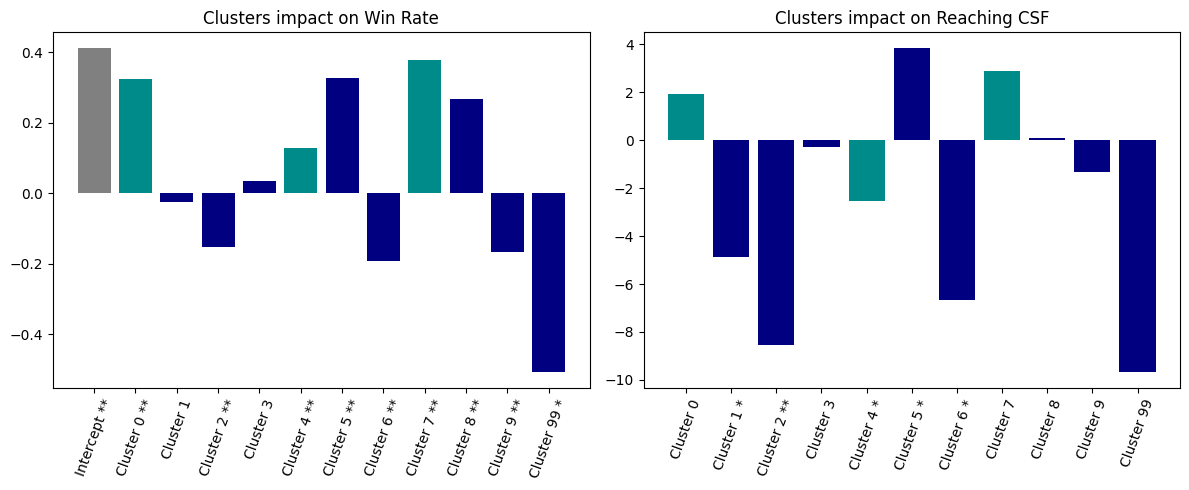

In [52]:
fig, axs = plt.subplots(1,2, figsize = (12,5))
plot_regression_coefficients(sm_object=linreg_cl, ax = axs[0],highlight_list=hl_cl)
axs[0].set_title("Clusters impact on Win Rate");
plot_regression_coefficients(sm_object=logreg_cl, ax = axs[1],highlight_list=hl_cl)
axs[1].set_title("Clusters impact on Reaching CSF");
plt.tight_layout()

In [53]:
mdf.loc[ke_demo_players]

,TEAM,YEAR,PLAYER_NAME,TOT_MIN,clusters
PLAYER,,,,,
_2000_Allen Iverson,PHI,2000,Allen Iverson,2856.0,0
_2009_Kobe Bryant,LAL,2009,Kobe Bryant,2960.2,0
_2020_LeBron James,LAL,2020,LeBron James,2318.2,0
_2000_Karl Malone,UTA,2000,Karl Malone,2943.8,4
_2008_Dirk Nowitzki,DAL,2008,Dirk Nowitzki,2772.0,4
_2022_Giannis Antetokounmpo,MIL,2022,Giannis Antetokounmpo,2204.3,4
_2000_Shaquille O'Neal,LAL,2000,Shaquille O'Neal,3167.9,7
_2009_Yao Ming,HOU,2009,Yao Ming,2587.2,7
_2018_Joel Embiid,PHI,2018,Joel Embiid,1915.2,7


In [54]:
pd.DataFrame(cl_dict)

,0,1,2,3,4,5,6,7,8,9,99
0,_2003_Allen Iverson_PHI,_2004_Rafer Alston_MIA,_2001_Antawn Jamison_GSW,_2000_P.J. Brown_MIA,_2003_Kevin Garnett_MIN,_2003_Lucious Harris_NJN,_2000_Michael Olowokandi_LAC,_2002_Tim Duncan_SAS,_2003_Shawn Marion_PHX,_2007_Trenton Hassell_MIN,_2022_Aleksej Pokusevski_OKC
1,_2000_Michael Finley_DAL,_2001_Mark Jackson_NYK,_2001_Antoine Walker_BOS,_2004_Jason Collins_NJN,_2006_Shawn Marion_PHX,_2000_Aaron McKie_PHI,_2001_Aaron Williams_NJN,_2003_Tim Duncan_SAS,_2006_Antawn Jamison_WAS,_2016_Hollis Thompson_PHI,_2021_Aleksej Pokusevski_OKC
2,_2001_Michael Finley_DAL,_2005_Luke Ridnour_SEA,_2003_Jalen Rose_CHI,_2010_Anderson Varejao_CLE,_2001_Anthony Mason_MIA,_2003_Walter McCarty_BOS,_2003_Malik Allen_MIA,_2001_Tim Duncan_SAS,_2004_Peja Stojakovic_SAC,_2002_Jumaine Jones_CLE,_2021_Xavier Tillman_MEM
3,_2008_Allen Iverson_DEN,_2000_Avery Johnson_SAS,_2008_Joe Johnson_ATL,_2005_Mark Blount_BOS,_2001_Shareef Abdur-Rahim_VAN,_2007_Chris Duhon_CHI,_2009_Jason Thompson_SAC,_2000_Shaquille O'Neal_LAL,_2005_Joe Johnson_PHX,_2001_Eric Piatkowski_LAC,_2008_Marcus Williams_NJN
4,_2000_Gary Payton_SEA,_2005_Gary Payton_BOS,_2004_Joe Johnson_PHX,_2011_Thaddeus Young_PHI,_2000_Kevin Garnett_MIN,_2006_Clifford Robinson_NJN,_2009_Spencer Hawes_SAC,_2004_Ben Wallace_DET,_2004_Cuttino Mobley_HOU,_2011_Ryan Gomes_LAC,_2022_Brandon Boston Jr._LAC
5,_2002_Antoine Walker_BOS,_2008_Jose Calderon_TOR,_2006_Joe Johnson_ATL,_2009_Luc Mbah a Moute_MIL,_2004_Kevin Garnett_MIN,_2007_Michael Finley_SAS,_2011_JJ Hickson_CLE,_2011_Pau Gasol_LAL,_2011_Luol Deng_CHI,_2006_Jumaine Jones_CHA,_2022_Xavier Tillman_MEM
6,_2003_Kobe Bryant_LAL,_2010_Beno Udrih_SAC,_2002_Latrell Sprewell_NYK,_2000_Jerome Williams_DET,_2006_Lamar Odom_LAL,_2005_Casey Jacobsen_NOH,_2000_Jamie Feick_NJN,_2005_Elton Brand_LAC,_2000_Allan Houston_NYK,_2005_Trenton Hassell_MIN,_2021_Matt Thomas_UTA
7,_2006_Gilbert Arenas_WAS,_2001_Travis Best_IND,_2001_Gary Payton_SEA,_2011_Luc Mbah a Moute_MIL,_2000_Shareef Abdur-Rahim_VAN,_2000_Derek Fisher_LAL,_2006_Tony Battie_ORL,_2000_Dikembe Mutombo_ATL,_2002_Eddie Jones_MIA,_2011_Wesley Johnson_MIN,_2008_DJ Mbenga_LAL
8,_2005_LeBron James_CLE,_2002_Kenny Anderson_BOS,_2003_Antawn Jamison_GSW,_2003_Corliss Williamson_DET,_2011_LaMarcus Aldridge_POR,_2002_Devean George_LAL,_2013_Bismack Biyombo_CHA,_2011_Dwight Howard_ORL,_2002_Wally Szczerbiak_MIN,_2018_Dragan Bender_PHX,_2002_Chris Dudley_POR
9,_2006_LeBron James_CLE,_2008_Steve Blake_POR,_2011_Monta Ellis_GSW,_2005_Jared Jeffries_WAS,_2004_Shawn Marion_PHX,_2016_Thabo Sefolosha_ATL,_2002_Nazr Mohammed_ATL,_2001_Shaquille O'Neal_LAL,_2004_Jim Jackson_HOU,_2004_Raja Bell_UTA,_2005_Jamal Sampson_CHA


#### Single regressors

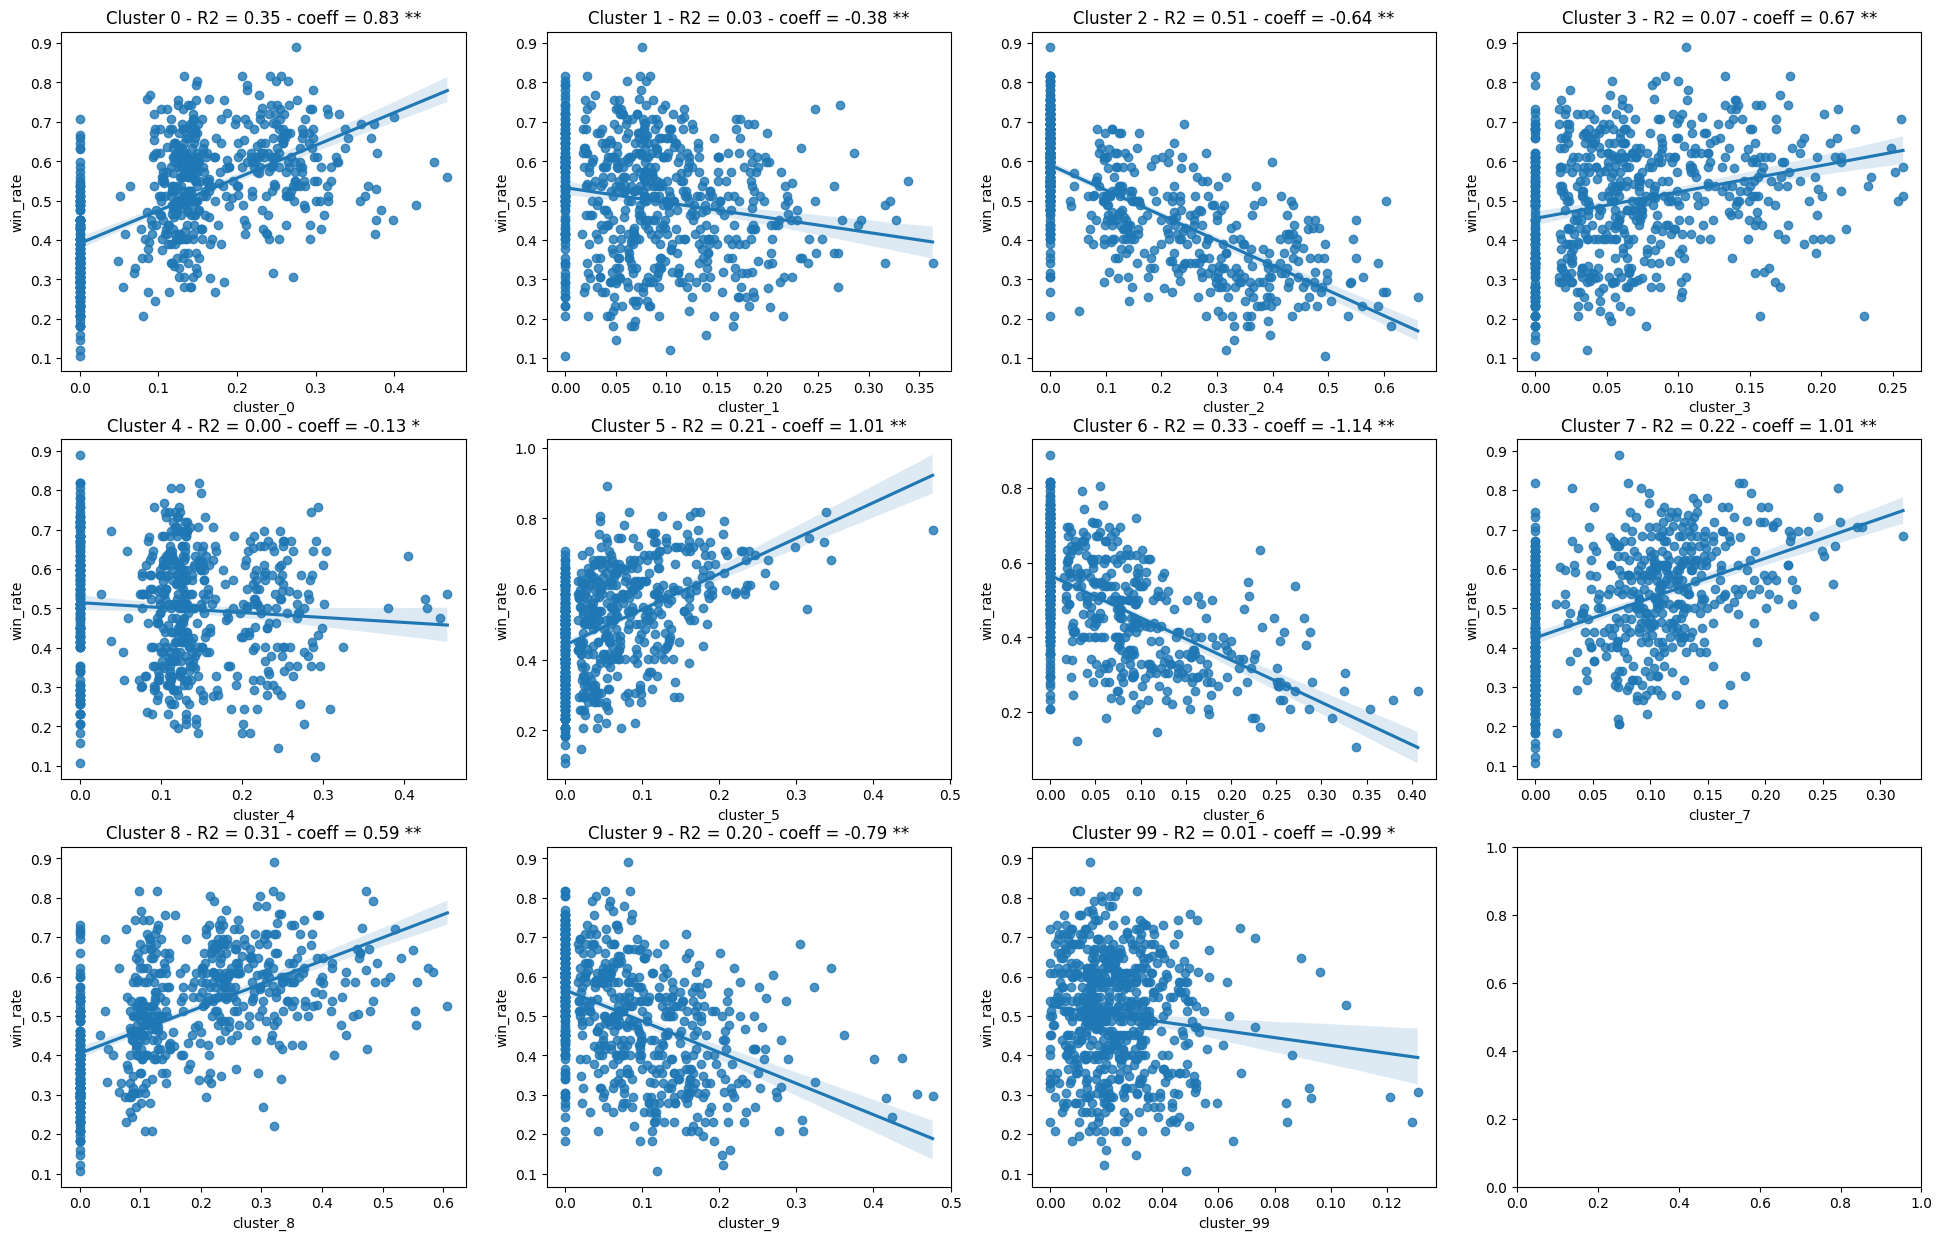

In [ ]:
tmp_df = tr_df.dropna().copy().rename(columns= {col: f"cluster_{col}" for col in tr_df.columns if type(col) == int})

fig, axs = plt.subplots(n_clusters // 4 +1, 4, figsize = (24, (n_clusters//4 +1)*5 ))

for cl, ax in zip(X_cl.columns, axs.flatten()) :
    tmp_linreg = sm.OLS.from_formula(f'win_rate ~ cluster_{cl}', tmp_df).fit()
    sns.regplot(data = tmp_df, x = f'cluster_{cl}', y = 'win_rate', ax = ax);
    p_val = tmp_linreg.pvalues.iloc[1]
    str_pval = ('*' if p_val < 0.05 else '') + ('*' if p_val < 0.001 else '') 
    title = f"Cluster {cl} | R2 = {tmp_linreg.rsquared_adj:.2f} | coeff = {tmp_linreg.params.iloc[1]:.2f} {str_pval}"
    ax.set_title(title)

In [ ]:
ind = 0

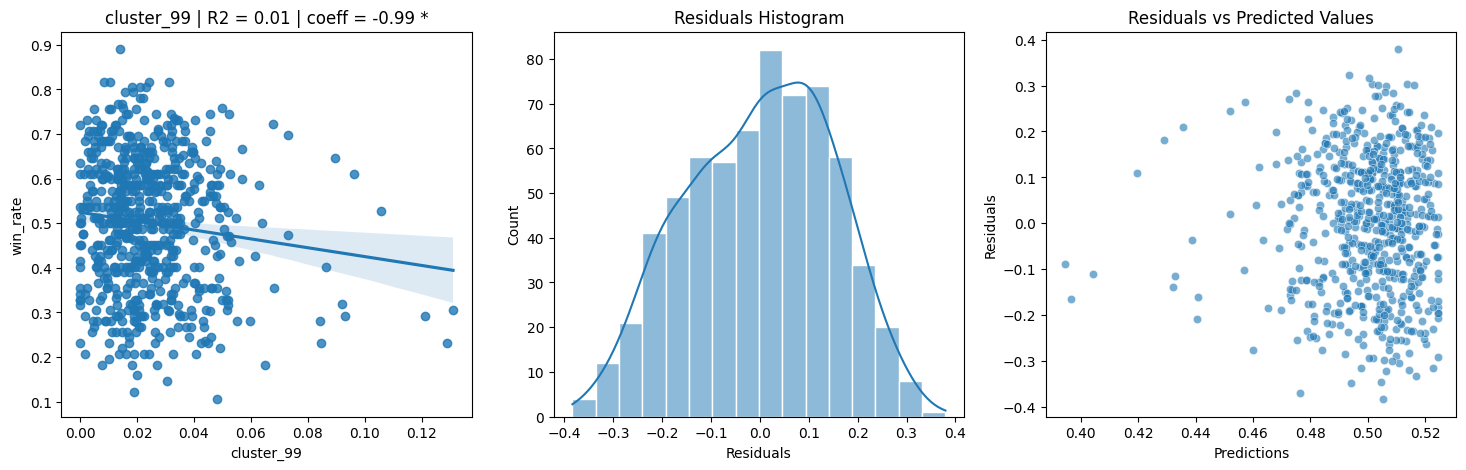

In [131]:
simple_linear_regression_plots(target='win_rate', feature= f'cluster_{clusters[ind%n_clusters]}', data = tmp_df);
ind +=1

### Transition vs success regressions

#### w/o interactions

In [55]:
X_tr = tr_df[['player_jaccard','player_cosine','cluster_cosine']].dropna()
Y_tr_wr = tr_df[tr_df['player_jaccard'].isna()==False]['win_rate'].values
Y_tr_csf = tr_df[tr_df['player_jaccard'].isna()==False]['csf'].values
X_tr.shape, Y_tr_wr.shape, Y_tr_csf.shape

((655, 3), (655,), (655,))

In [56]:
X_tr= sm.add_constant(X_tr)
pd.Series([vif(X_tr.values, i) 
               for i in range(X_tr.shape[1])], 
              index=X_tr.columns)

const             19.701209
player_jaccard     2.459102
player_cosine      2.498063
cluster_cosine     1.037919
dtype: float64

In [57]:
linreg_tr = sm.OLS(Y_tr_wr,X_tr).fit()
linreg_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     63.81
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           3.54e-36
Time:                        15:16:32   Log-Likelihood:                 401.40
No. Observations:                 655   AIC:                            -794.8
Df Residuals:                     651   BIC:                            -776.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2375      0.023     10.413      0.000       0.193       0.282
player_jaccard    -0.0689      0.061     -1.131      0.258      -0.189       0.051
player_cosine      0.4100      0.044      9.261      0.000       0.323       0.497
cluster_cosine     0.0480      0.025      1.948      0.052      -0.000       0.096
==============================================================================
Omnibus:                       12.774   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.892
Skew:                          -0.097   Prob(JB):                       0.0193
Kurtosis:                       2.499   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
logreg_tr_mod = sm.Logit(Y_tr_csf, X_tr)
logreg_tr = logreg_tr_mod.fit()
logreg_tr.summary()

Optimization terminated successfully.
         Current function value: 0.525250
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  655
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Oct 2025   Pseudo R-squ.:                 0.09745
Time:                        15:16:33   Log-Likelihood:                -344.04
converged:                       True   LL-Null:                       -381.19
Covariance Type:            nonrobust   LLR p-value:                 5.130e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5822      0.524     -8.743      0.000      -5.609      -3.555
player_jaccard    -2.7743      1.084     -2.559      0.010      -4.899      -0.650
player_cosine      5.7287      0.912      6.283      0.000       3.942       7.516
cluster_cosine     1.1578      0.486      2.380      0.017       0.204       2.111
==================================================================================
"""

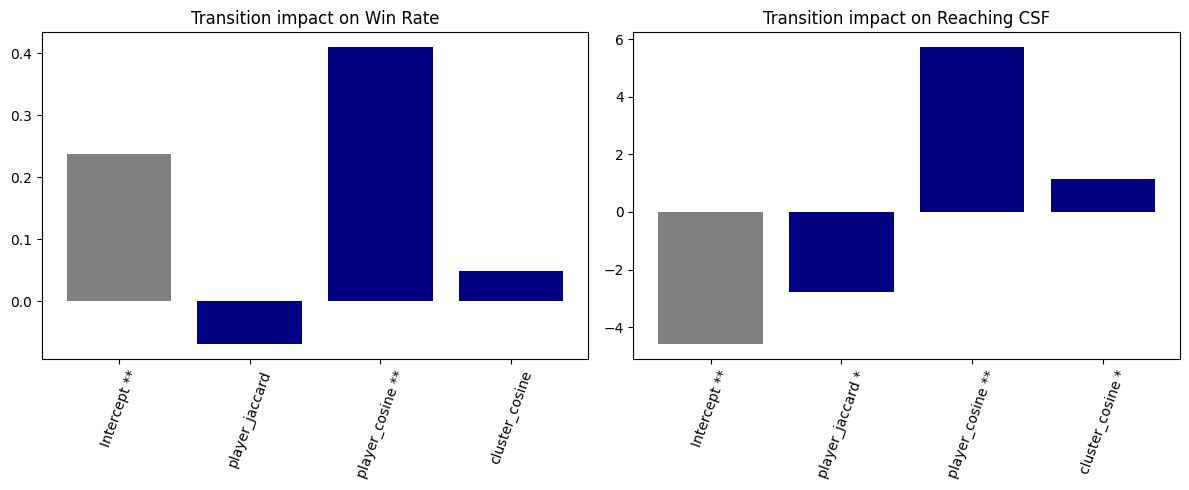

In [59]:
fig, axs = plt.subplots(1,2, figsize = (12,5))
plot_regression_coefficients(sm_object=linreg_tr, ax = axs[0],highlight_list=hl_cl)
axs[0].set_title("Transition impact on Win Rate");
plot_regression_coefficients(sm_object=logreg_tr, ax = axs[1],highlight_list=hl_cl)
axs[1].set_title("Transition impact on Reaching CSF");
plt.tight_layout()

#### with interactions

In [60]:
data = tr_df[['player_cosine','cluster_cosine', 'win_rate']].dropna()

linreg_tr_inter = sm.OLS.from_formula('win_rate ~ player_cosine + cluster_cosine + player_cosine:cluster_cosine', data).fit()
linreg_tr_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               win_rate   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     65.22
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.00e-37
Time:                        15:16:33   Log-Likelihood:                 403.04
No. Observations:                 655   AIC:                            -798.1
Df Residuals:                     651   BIC:                            -780.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.3438      0.055      6.303      0.000       0.237       0.451
player_cosine                    0.1893      0.090      2.101      0.036       0.012       0.366
cluster_cosine                  -0.1059      0.076     -1.389      0.165      -0.256       0.044
player_cosine:cluster_cosine     0.2606      0.122      2.134      0.033       0.021       0.501
==============================================================================
Omnibus:                       12.985   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.925
Skew:                          -0.093   Prob(JB):                       0.0190
Kurtosis:                       2.494   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
data = tr_df[['player_cosine','cluster_cosine', 'csf']].dropna()

logreg_tr_inter_mod = sm.Logit.from_formula('csf ~ player_cosine + cluster_cosine + player_cosine:cluster_cosine', data)
logreg_tr_inter = logreg_tr_inter_mod.fit()
logreg_tr_inter.summary()

Optimization terminated successfully.
         Current function value: 0.530088
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    csf   No. Observations:                  655
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Oct 2025   Pseudo R-squ.:                 0.08914
Time:                        15:16:47   Log-Likelihood:                -347.21
converged:                       True   LL-Null:                       -381.19
Covariance Type:            nonrobust   LLR p-value:                 1.169e-14
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.5326      1.454     -2.429      0.015      -6.383      -0.682
player_cosine                    2.6517      2.181      1.216      0.224      -1.623       6.927
cluster_cosine                  -0.0877      1.964     -0.045      0.964      -3.936       3.761
player_cosine:cluster_cosine     1.8723      2.892      0.647      0.517      -3.796       7.541
================================================================================================
"""

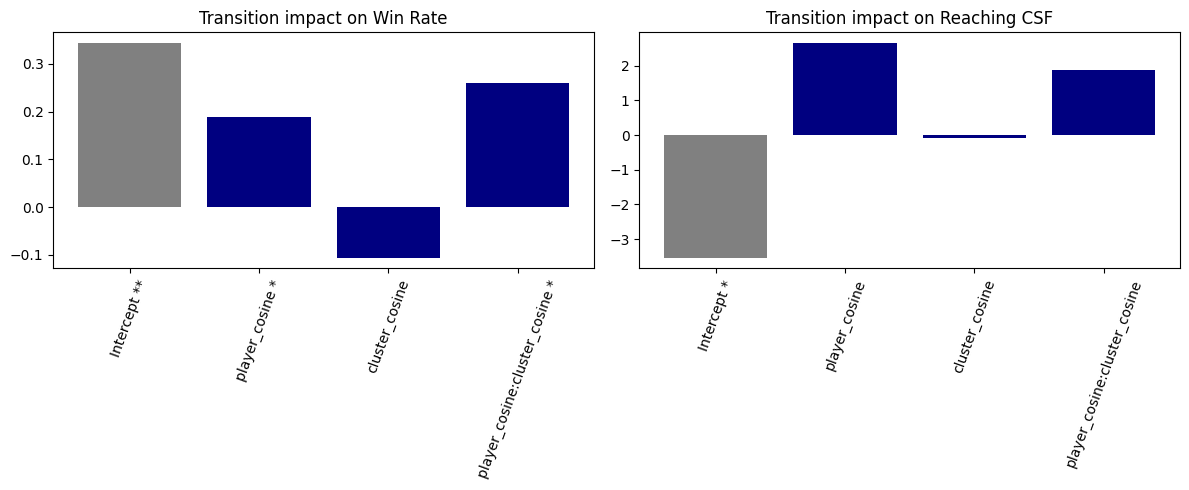

In [63]:
fig, axs = plt.subplots(1,2, figsize = (12,5))
plot_regression_coefficients(sm_object=linreg_tr_inter, ax = axs[0],highlight_list=hl_cl)
axs[0].set_title("Transition impact on Win Rate");
plot_regression_coefficients(sm_object=logreg_tr_inter, ax = axs[1],highlight_list=hl_cl)
axs[1].set_title("Transition impact on Reaching CSF");
plt.tight_layout()
